## Approaching categorical variables
### 类别变量
- Nominal, 无序的，男，女
- Ordinal, 有序的，低，中，高
- cyclic， 环状的，周一到周日

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [11]:
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [7]:
df["target"].value_counts()

0    487677
1    112323
Name: target, dtype: int64

target 是skewed,因此指标选用AUC，ROC更适合

### Label Encoding
对每个类别用数字编码

In [8]:
df['ord_2'].unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [12]:
df['ord_2'].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [9]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

/tmp/ipykernel_283945/606695737.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = df.ord_2.map(mapping)


In [10]:
df['ord_2'].value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

使用sklearn处理label encoding.注意NAN的处理

### 注意
LabelEncoder 只能用在tree-based models: decision trees, random forest, XGBoost,GBM,lightGBM 
不能用在线性模型中例如SVM, neural networks, 因为这些模型expect data to be normalized(standardized)对于这些模型，可以binarize data

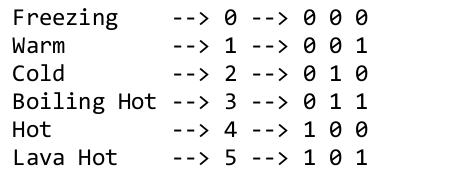

用binarized variables 还是 sparse format, sparse format 只关心有值的地方，比如上面1的位置


In [13]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

df['ord_2'].value_counts()

/tmp/ipykernel_283945/1976075718.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)


2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

### sparse representation
- 下面的数据

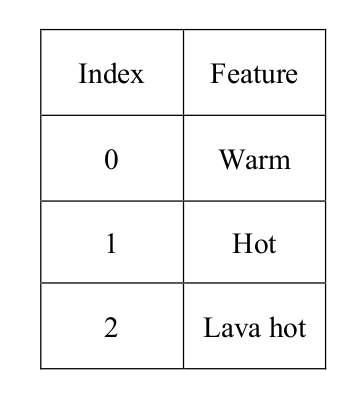

-用二进制表示后，变为3个feature

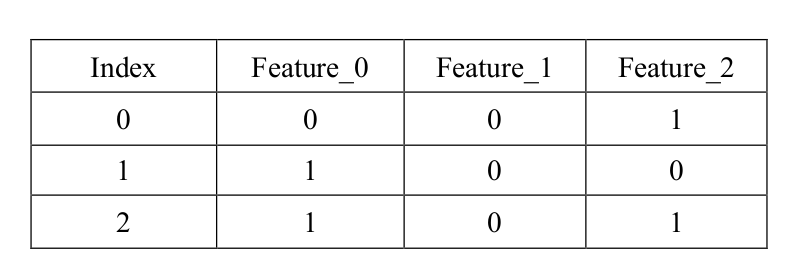

- sparse表示似乎只能减小存储空间？

In [14]:
import numpy as np
# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)
# print size in bytes
print(example.nbytes)

72


In [17]:
import numpy as np
from scipy import sparse
# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)
print(
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

32
64


### one hot
- 生成一个feature数量的长向量，然后将对应位置设置成1，

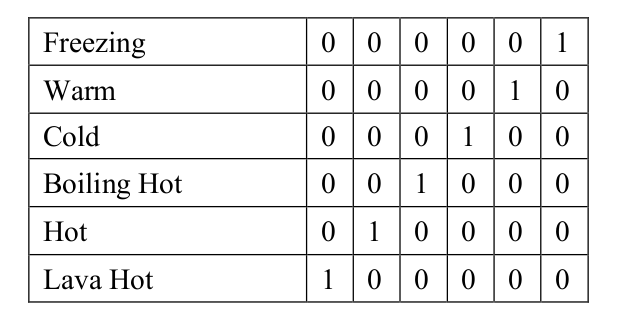

下面是onehot存储对比，8GB的数，大概只用8MB的sparse array

In [19]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Size of dense array: 8000000000


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Size of sparse array: 8000000
Full size of sparse array: 16000004


In [20]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")

In [23]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

可以用count来给categorical feature数值化

In [24]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

可以通过组合多行来创造新feature, 组合哪些feature？如果不考虑存储和计算成本，组合的越多越好，然后用其他方法去看哪种组合最高效

In [25]:
df["new_feature"] = (
    df.ord_1.astype(str)
    + "_"
    + df.ord_2.astype(str)
)
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

### Whenever you get categorical variables, follow these simple steps：
- 处理NAN
- 用 LabelEncoder or mapping dictionary 处理
- create one-hot encoding现在可以忽略 binarization方法
- modeling

### NAN处理方法
- drop 不建议，丢失很多信息
- 创建一个新的类型， 如下代码

In [26]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

### 当某些类型的样本，在训练集中从来没出现过，或者训练集中非常少见，但是测试集中非常多的数据，如何处理这种情况？

- 下面的讲解没有理解

``` If you have a fixed test set, you can add your test data to training to know about the
categories in a given feature. This is very similar to semi-supervised learning in
which you use data which is not available for training to improve your model. This
will also take care of rare values that appear very less number of times in training
data but are in abundance in test data. Your model will be more robust.
Many people think that this idea overfits. It may or may not overfit. There is a
simple fix for that. If you design your cross-validation in such a way that it
replicates the prediction process when you run your model on test data, then it’s
never going to overfit. It means that the first step should be the separation of folds,
and in each fold, you should apply the same pre-processing that you want to apply
to test data. Suppose you want to concatenate training and test data, then in each
fold you must concatenate training and validation data and also make sure that your
validation dataset replicates the test set. In this specific case, you must design your
validation sets in such a way that it has categories which are “unseen” in the training
set. ``` 

In [ ]:
import pandas as pd
from sklearn import preprocessing
# read training data
train = pd.read_csv("./cat-in-the-dat-ii/train.csv")
#read test data
test = pd.read_csv("./cat-in-the-dat-ii/test.csv")
# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1
# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)
# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]
# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

上面是一种取巧的方法，通过上面的方法可以在train set里提前知道所有的类型，然后按照类型全集去变成数字，这样在测试集中，遇到没见过的类型，也可以预测。

实际使用时，不一定能提前知道测试集的全集，因此可设置一个unknown类别，用来处理这种清理

In [49]:
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")

In [50]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [48]:
df.ord_4 = df.ord_4.fillna("NONE")
df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000,
    "ord_4"
] = "RARE"

df.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

上面的代码中，将 数量少于2000的归类到RARE类中，等到了test数据集，没见过的会map到RARE中。生产中也能用。

实际的例子：标签的分布是不均匀的，因此用StratifiedKFold划分数据，数据划分时要尽量保持每一折中的数据分布差不多

In [26]:
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
import os

def run(fold):    
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
        f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # initialize OneHotEncoder from scikit-learn
    ohe = preprocessing.OneHotEncoder()
    # fit ohe on training + validation features
    full_data = pd.concat(
        [df_train[features], df_valid[features]],
        axis=0
    )
    ohe.fit(full_data[features])
    # transform training data
    x_train = ohe.transform(df_train[features])
    # transform validation data
    x_valid = ohe.transform(df_valid[features])
    # initialize Logistic Regression model
    model = linear_model.LogisticRegression()
    # 也可以用random forest，不过onehot让feature数量变得很多，因此会消耗更多的时间train，最终结果也没有多好
    # model = ensemble.RandomForestClassifier(n_jobs=-1)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(auc)

In [27]:
run(0)

0.7868261142952667


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
# all columns are features except id, target and kfold columns
features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
]
# fill all NaN values with NONE
# note that I am converting all columns to "strings"
# it doesn’t matter because all are categories
for col in features:
    df.loc[:, col] = df[col].astype(str).fillna("NONE")
# get training data using folds
df_train = df[df.kfold != 1].reset_index(drop=True)
# get validation data using folds
df_valid = df[df.kfold == 1].reset_index(drop=True)
# initialize OneHotEncoder from scikit-learn
ohe = preprocessing.OneHotEncoder()
# fit ohe on training + validation features
full_data = pd.concat(
    [df_train[features], df_valid[features]],
    axis=0
)

ohe.fit(full_data[features])
# transform training data
x_train = ohe.transform(df_train[features])
# transform validation data
x_valid = ohe.transform(df_valid[features])

x_train

<480000x5723 sparse matrix of type '<class 'numpy.float64'>'
	with 11040000 stored elements in Compressed Sparse Row format>

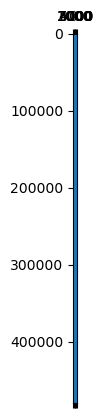

In [59]:
import matplotlib.pyplot as plt
plt.spy(x_train)
plt.show()

In [30]:
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    
    # 注意和onehot的区别
    for col in features:
        lbl = preprocessing.LabelEncoder()
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # 这里使用的数据需要去掉target
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    
    
    # initialize random forest model
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    
    # 直接用回报错，效果不太行
    # model = linear_model.LogisticRegression()
    
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")

In [31]:
run(0)

/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem

Fold = 0, AUC = 0.7153489290943666


### onehot 用在random forest上面，并使用SVD降维

In [32]:
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from scipy import sparse
from sklearn import decomposition
import os

def run(fold):    
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
        f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # initialize OneHotEncoder from scikit-learn
    ohe = preprocessing.OneHotEncoder()
    # fit ohe on training + validation features
    full_data = pd.concat(
        [df_train[features], df_valid[features]],
        axis=0
    )
    ohe.fit(full_data[features])
    # transform training data
    x_train = ohe.transform(df_train[features])
    # transform validation data
    x_valid = ohe.transform(df_valid[features])

    # initialize Truncated SVD
    # we are reducing the data to 120 components
    svd = decomposition.TruncatedSVD(n_components=120)
    # fit svd on full sparse training data
    full_sparse = sparse.vstack((x_train, x_valid))
    svd.fit(full_sparse)
    # transform sparse training data
    x_train = svd.transform(x_train)
    # transform sparse validation data
    x_valid = svd.transform(x_valid)
    
    
    # initialize Logistic Regression model
    # model = linear_model.LogisticRegression()
    # 也可以用random forest，不过onehot让feature数量变得很多，因此会消耗更多的时间train，最终结果也没有多好
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(auc)

In [33]:
run(0)

0.7060136099101519


### 继续尝试xgboost，应为是tree based 算法，因此继续使用label encoded data
- dropping certain columns which don’t add any value to the model

In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
import xgboost as xgb
from sklearn import preprocessing


def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    
    # 注意和onehot的区别
    for col in features:
        lbl = preprocessing.LabelEncoder()
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # 这里使用的数据需要去掉target
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    
    
    model = xgb.XGBClassifier(
        n_jobs=-1,
        max_depth=7,
        n_estimators=200
    )
    
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
    
run(0)

/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

Fold = 0, AUC = 0.7616481748915062
